In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import PyCMF
import numpy as np
from generators import DiagBooleanMatrix, ArbiBooleanMatrix

[I] m            : 2000
[I] n            : 1000
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 2023
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.


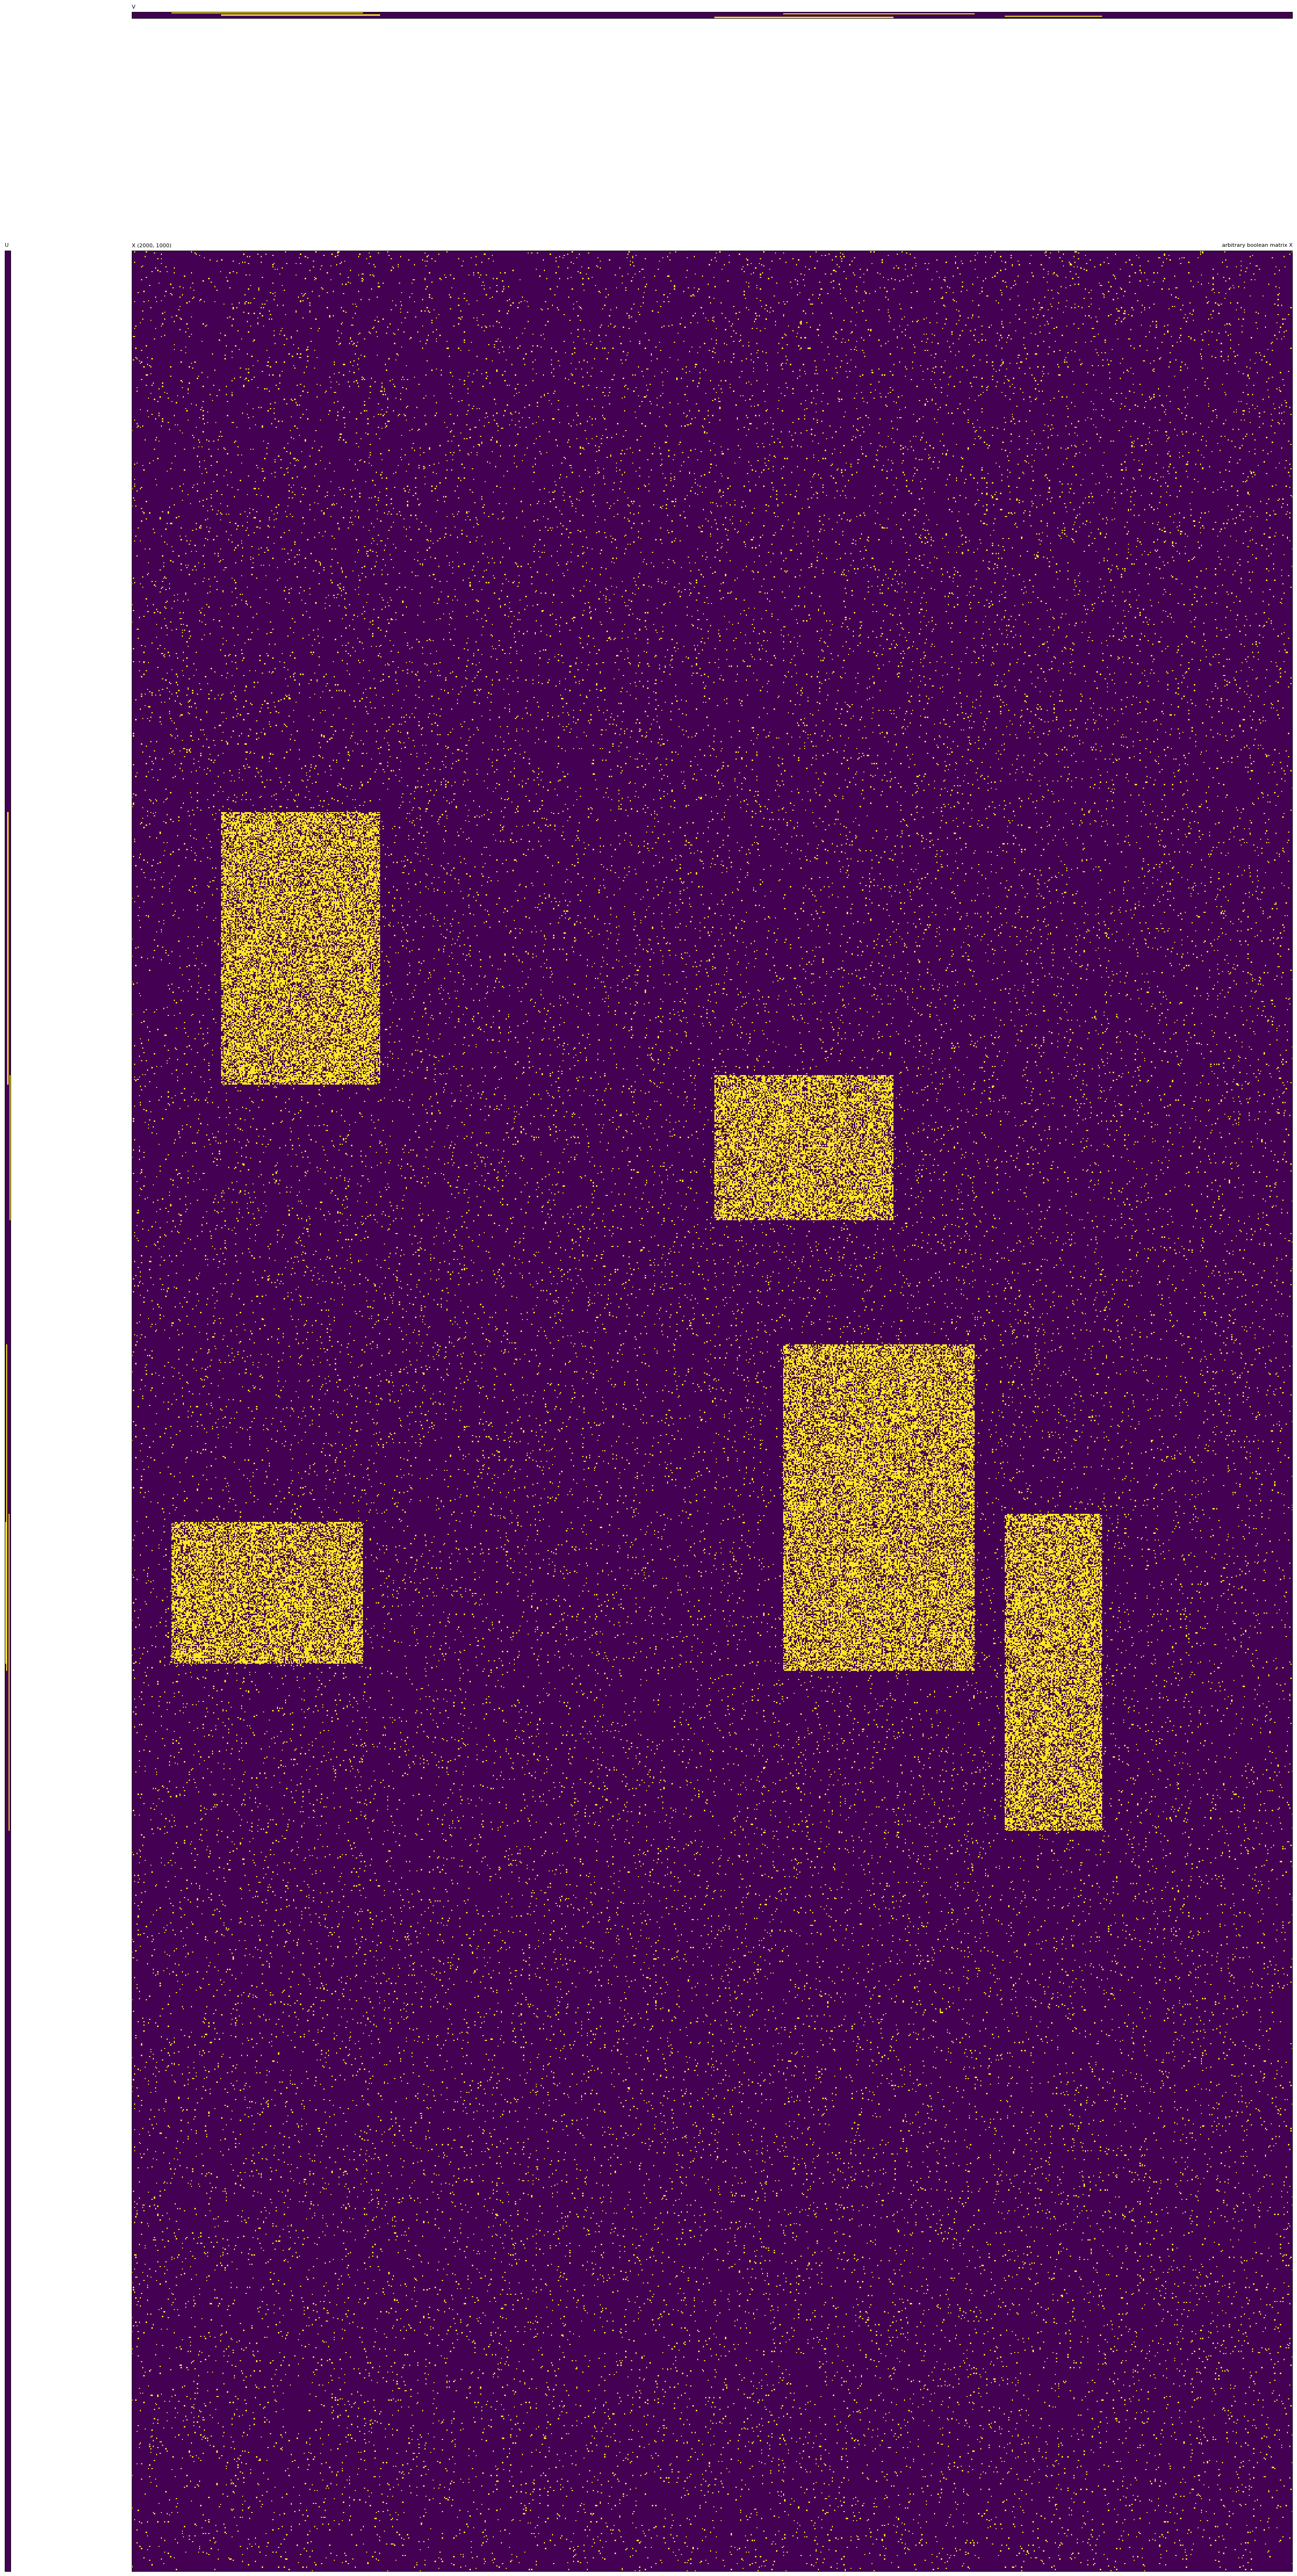

[I] m            : 200
[I] n            : 1000
[I] k            : 5
[I] overlap      : [0.2 0.1 0.2 0.1]
[I] seed         : 1997
[I] seed         : 2023
[I] Using RandomState.
[I] Using RandomState.
[I] noise        : [0.3 0.1]
[I] seed         : 1024
[I] Using RandomState.


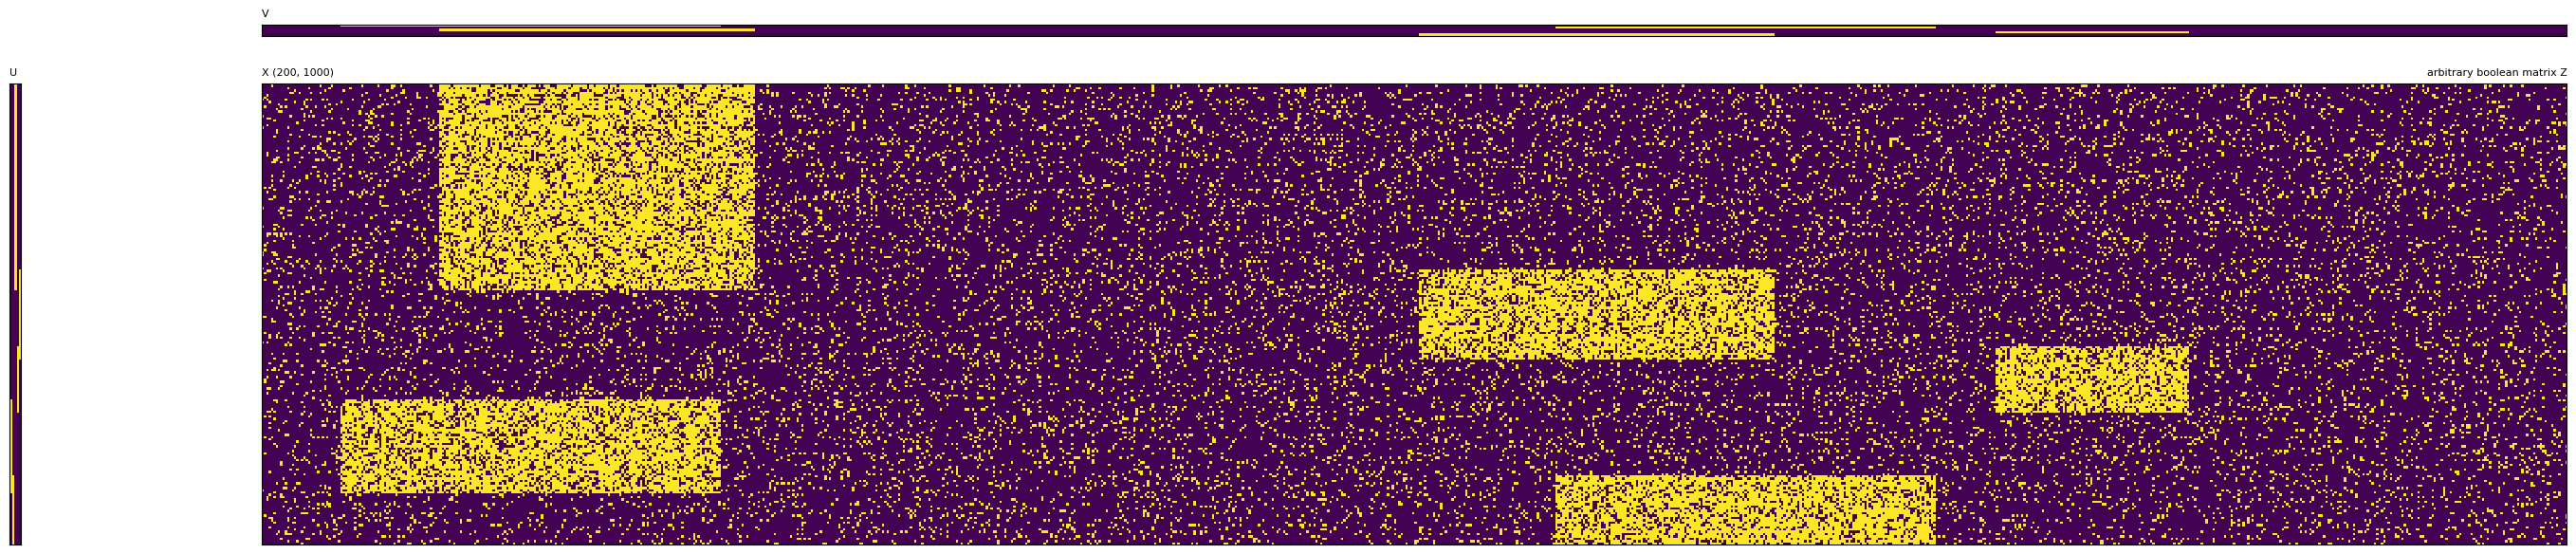

In [3]:
# generate arbitrary Boolean matrix (X)

n_row=2000
n_col=1000
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = ArbiBooleanMatrix(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=2023) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(title='arbitrary boolean matrix X')

# generate arbitrary Boolean matrix (Z)

n_row=200
n_col=1000
k=5
overlap=[0.2, 0.1, 0.2, 0.1]
noise=[0.3, 0.1]

Z = DiagBooleanMatrix(m=n_row, n=n_col, k=k, overlap=overlap)
Z.generate(seed=1997)
Z.shuffle_factors(seed=2023)
Z.V = X.V # replace one factor
Z.boolean_matmul()
Z.add_noise(noise=noise, seed=1024)
Z.show_matrix(title="arbitrary boolean matrix Z")

In [4]:
# X = np.abs(np.random.randn(5, 4)); Y = np.abs(np.random.randn(4, 1))
# model = PyCMF(n_components=4)
# U, V, Z = model.fit_transform(X, Y)

Epoch 01 reached after 18.273 seconds, error: 267.314417


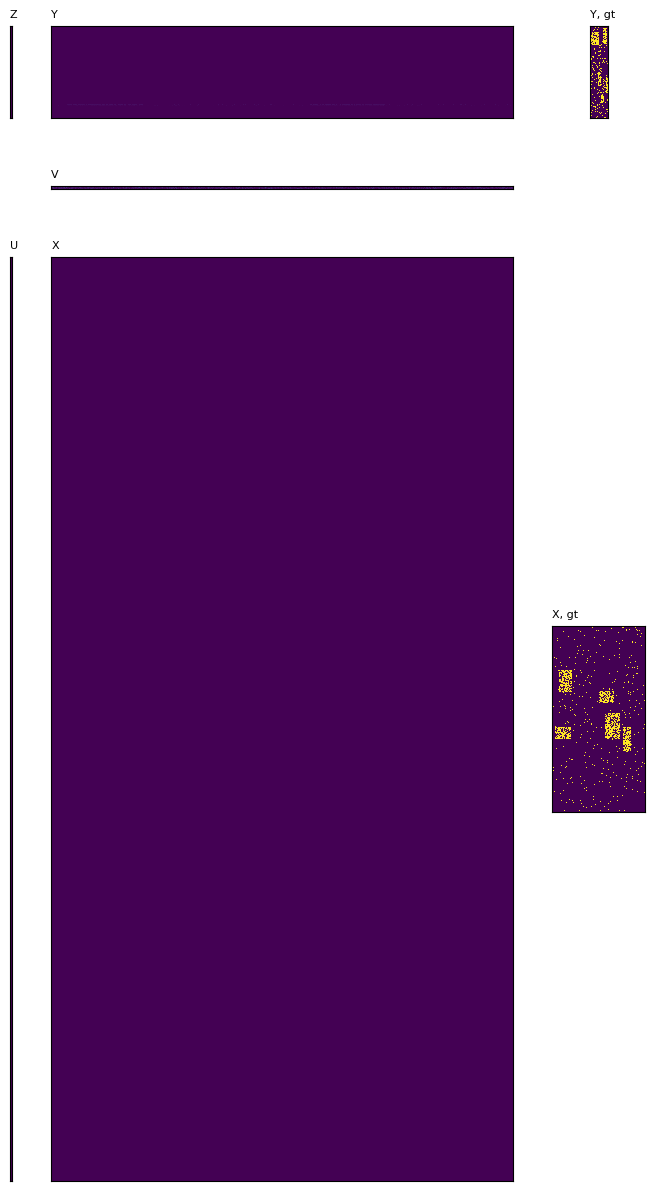

Epoch 02 reached after 37.416 seconds, error: 268.070382
Epoch 02 reached after 37.416 seconds.


In [6]:
from utils import show_matrix

pycmf = PyCMF(
    k,
    U_non_negative=True, V_non_negative=True, Z_non_negative=True,
    x_link="logit", y_link="logit", alpha="auto", l1_reg=0., l2_reg=0., max_iter=10,
    solver="newton", verbose=True
)

U, V, W = pycmf.fit_transform(X.X, Z.X.T)